<a href="https://colab.research.google.com/github/KhotNoorin/Machine-Learning-/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting:

Gradient Boosting is a **supervised machine learning algorithm** used for regression, classification, and ranking problems. It is an **ensemble technique** that builds a strong predictive model by combining multiple weak learners, typically **decision trees**, in a **sequential** manner.

The core idea is to **minimize a loss function** by adding new models that predict the **residual errors** (gradients) of the previous models.

---

## Key Components

### 1. Loss Function
Gradient Boosting is **flexible** and can optimize different loss functions:
- Regression: Mean Squared Error (MSE)
- Classification: Log Loss (cross-entropy)
- Ranking: Pairwise loss (e.g., in learning to rank)

### 2. Base Learners
- Usually shallow **decision trees** (depth 3–5)
- Fast to train, but individually weak

### 3. Gradient Descent
Gradient Boosting performs **gradient descent in function space**, minimizing the loss function by updating the model in the direction of the negative gradient.

---

## Regularization Techniques

Gradient Boosting can **overfit** if not regularized. Common techniques include:

| Technique          | Description |
|--------------------|-------------|
| Learning Rate (η)  | Scales the contribution of each tree. Smaller values = slower but better generalization. |
| Subsampling        | Use a random subset of data for each tree. Helps reduce variance (a.k.a. stochastic gradient boosting). |
| Tree Constraints   | Limit max depth, number of leaf nodes, or minimum samples per leaf. |
| Number of Trees    | Too many trees can lead to overfitting. Tune carefully with validation. |

---

## Advantages
- High accuracy and predictive performance
- Handles different types of data (numerical, categorical)
- Flexible with custom loss functions
- Built-in feature importance

---

## Disadvantages
- Computationally intensive
- Sequential training → slower than bagging methods
- Sensitive to hyperparameters
- Less interpretable than a single tree

---

## Popular Implementations

| Library       | Description |
|---------------|-------------|
| **XGBoost**   | Fast, scalable implementation with regularization |
| **LightGBM**  | Optimized for large datasets and categorical features |
| **CatBoost**  | Handles categorical features automatically |
| **scikit-learn** | Easy-to-use GradientBoostingClassifier and Regressor |

---

## Common Use Cases
- Credit scoring and fraud detection
- Ranking and recommendation systems
- Insurance risk modeling
- Customer churn prediction
- Kaggle competitions (XGBoost and LightGBM are often winners)

---

## Summary
Gradient Boosting is one of the most powerful and widely-used machine learning algorithms. It builds an additive model in a forward stage-wise manner and allows for the optimization of arbitrary differentiable loss functions. With proper tuning and regularization, Gradient Boosting models can achieve state-of-the-art performance on structured data tasks.

## How It Works

Let:
- $y_i$: Actual target
- $\hat{y}_i^{(m)}$: Prediction at iteration $m$
- $L(y, \hat{y})$: Loss function (e.g., MSE, Log Loss)

### Step-by-Step Algorithm

1. **Initialize the model with a constant prediction**:

$$
F_0(x) = \arg\min_c \sum_{i=1}^{n} L(y_i, c)
$$

2. **For each boosting iteration $m = 1$ to $M$**:

   - Compute **pseudo-residuals**:

   $$
   r_i^{(m)} = -\left[\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}\right]
   $$

   - Fit a **weak learner** (e.g., decision tree) to the residuals:

   $$
   h_m(x) \approx r_i^{(m)}
   $$

   - Compute **optimal step size** $\gamma_m$:

   $$
   \gamma_m = \arg\min_\gamma \sum_{i=1}^{n} L\left(y_i, F_{m-1}(x_i) + \gamma \cdot h_m(x_i)\right)
   $$

   - Update the model:

   $$
   F_m(x) = F_{m-1}(x) + \gamma_m \cdot h_m(x)
   $$

3. **Final model after $M$ iterations**:

$$
F_M(x) = F_0(x) + \sum_{m=1}^{M} \gamma_m \cdot h_m(x)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

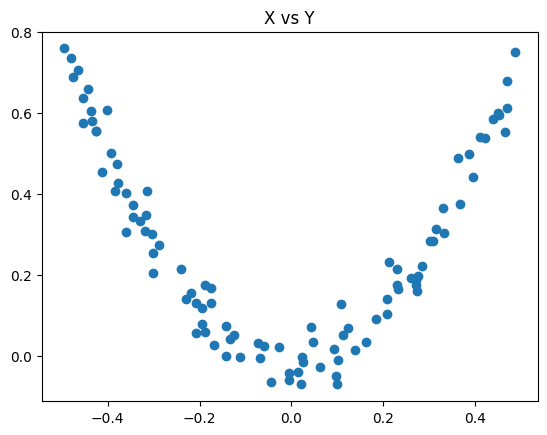

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


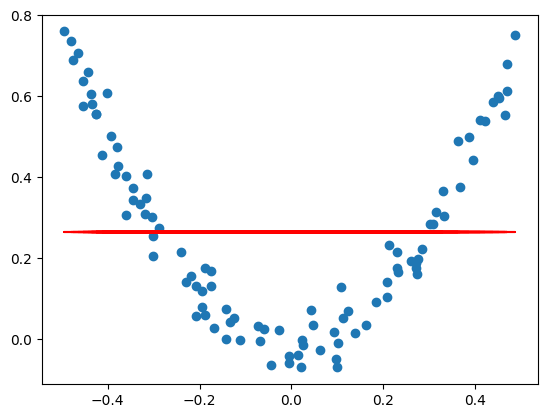

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

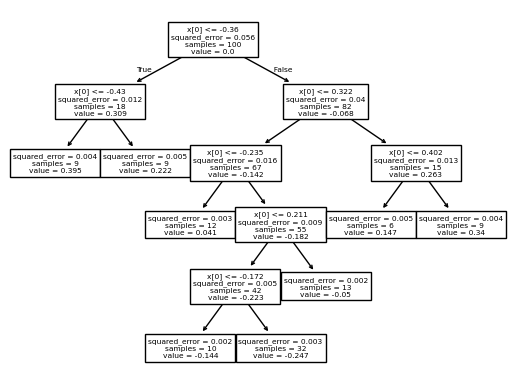

In [16]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [17]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [18]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

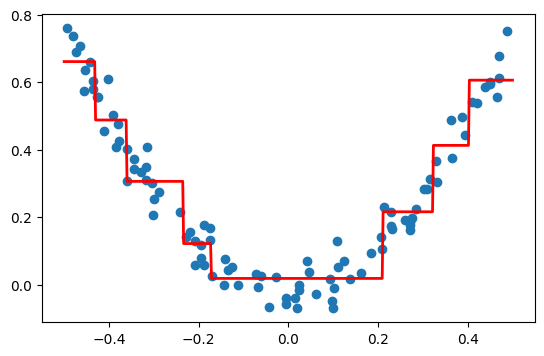

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [21]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [22]:
df['res2'] = df['y'] - df['pred2']

In [23]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [24]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

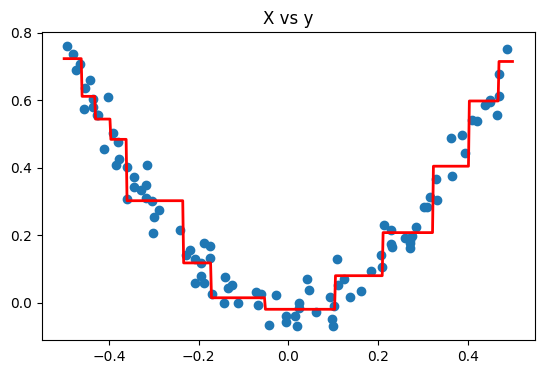

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [28]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


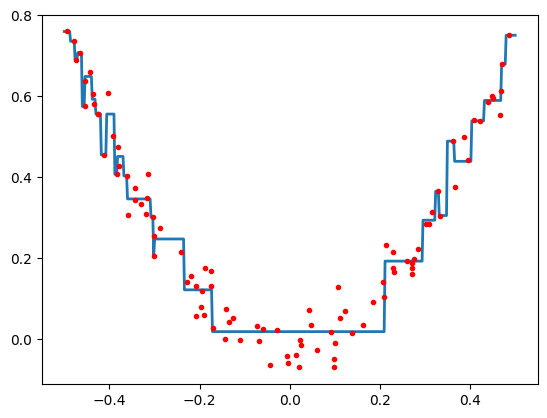

4


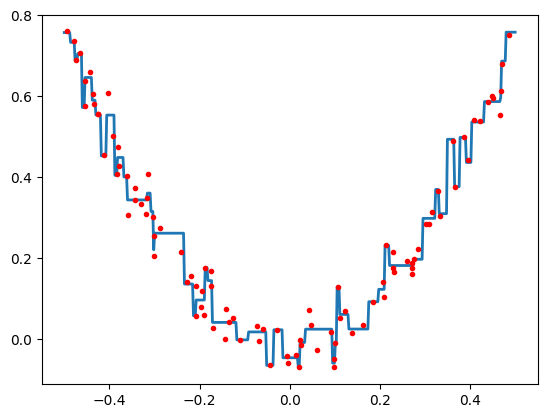

3


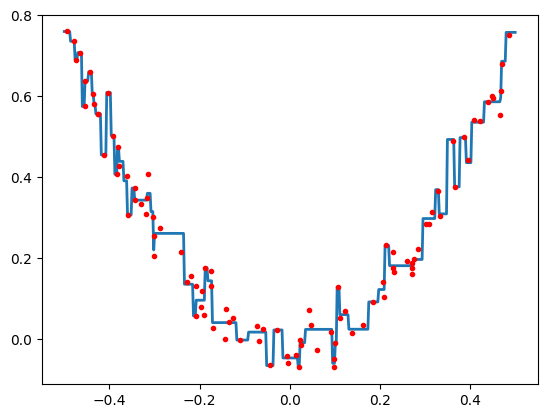

2


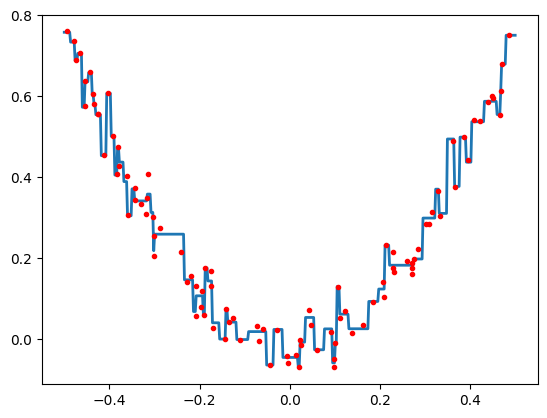

1


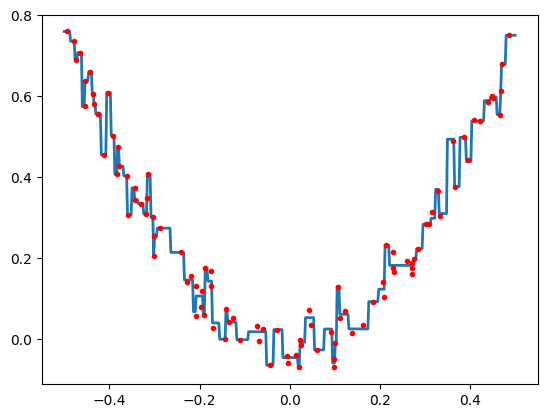

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

# Gradient Boosting: Step-by-Step


## Step 1: Data Generation

We generate a synthetic dataset based on a **quadratic function** with added noise:

$$
y = 3x^2 + \varepsilon
$$

Where:
- $x$ is uniformly sampled from $[-0.5, 0.5]$
- $\varepsilon$ is small Gaussian noise

This creates a nonlinear regression task.

---

## Step 2: Baseline Model (Initial Prediction)

We start with a **constant model** which simply predicts the **mean of the target**:

$$
\hat{y}^{(0)} = \bar{y}
$$

This is our **initial model**, which ignores $x$ completely. The residuals are:

$$
r_1 = y - \hat{y}^{(0)}
$$

We visualize this as a horizontal line across the dataset.

---

## Step 3: First Tree Learner (Fit on Residuals)

Next, we train a **decision tree regressor** on the residuals:

$$
h_1(x) \approx r_1
$$

This tree tries to model the structure in the **errors** of the initial constant prediction. Then, we update the prediction as:

$$
\hat{y}^{(1)} = \hat{y}^{(0)} + h_1(x)
$$

This update moves our predictions closer to the true targets.

---

## Step 4: Second Tree Learner

We compute the new residuals:

$$
r_2 = y - \hat{y}^{(1)}
$$

We again train a tree on these residuals:

$$
h_2(x) \approx r_2
$$

Update the prediction:

$$
\hat{y}^{(2)} = \hat{y}^{(1)} + h_2(x)
$$

---

## Step 5: Repeat the Process

At each step:
1. Compute residuals from current prediction.
2. Train a new decision tree on residuals.
3. Add new tree predictions to previous model:

$$
\hat{y}^{(m)} = \hat{y}^{(m-1)} + h_m(x)
$$

This process continues for a fixed number of steps or until the residuals become sufficiently small.

---

## Step 6: Recursive Gradient Boosting Function

The gradient_boost function automates this boosting process:

- It accepts training data $(X, y)$
- Fits a sequence of trees
- Adds each new tree’s predictions to the model
- Shows the prediction curve at each stage

### Parameters:
- number: Number of boosting rounds
- lr: Learning rate (shrinkage factor)
- regs: List of decision tree regressors
- foo: Original target for visualization
- count: Recursion depth (starts from 1)

At each recursion:
1. Residuals are updated.
2. New tree is fit.
3. All tree predictions are added with learning rate scaling:

$$
\hat{y}(x) = \sum_{m=1}^{M} \eta \cdot h_m(x)
$$

Where $\eta$ is the learning rate.

---

## Final Output

Each plot shows how the prediction improves as new trees are added. The red dots represent original data, and the curve shows the evolving prediction.

This recursive implementation is a simplified yet powerful visualization of how Gradient Boosting incrementally fits models to **learn from errors**, ultimately improving performance in **a stage-wise fashion**.

---

## Summary

- Gradient Boosting builds models **sequentially**.
- Each model fits on **residuals** (gradients) of the previous model.
- Decision trees are commonly used weak learners.
- Learning rate controls the contribution of each learner.
- Final prediction is the **sum of all learners**, improving accuracy with each step.


# Gradient Boosting for Classification

In [48]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [49]:
# initial prediction

df['pre1(log-odds)'] = np.log(5/3)
df

,cgpa,iq,is_placed,pre1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [50]:
# convert log odds to probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [51]:
# calculating residual for stage 1
df['res1'] = df['is_placed'] - df['pre1(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [52]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

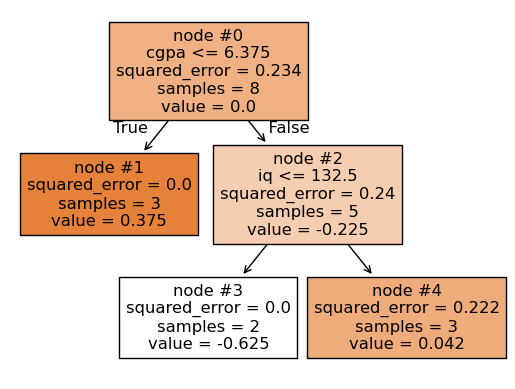

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [54]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [55]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [56]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)

In [57]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [58]:
df['res2'] = df['is_placed'] - df['pre2(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


In [59]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

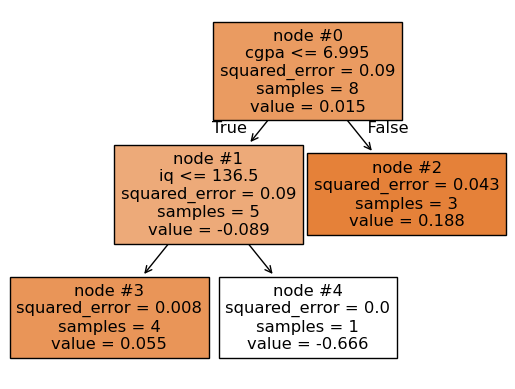

In [60]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [61]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [62]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)

In [63]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [64]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [65]:
df['res_final'] = df['is_placed'] - df['pre3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
